$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\PPhi}{\Phi(x,y;\xi,\eta)}
$$

#Boundary Element Method

This Jupyter notebook follows the notation and approach of WT Ang's "A Beginner's Course in Boundary Element Methods" [Chapter 1](http://pulasan.spms.ntu.edu.sg:8000/user/rhea/edit/pap751/Documents/bemchap1a5.pdf).


We want to solve the Laplace equation

$$\ppad{\phi}{x}+\ppad{\phi}{y}=0\tag{1}$$

in a region $R$ with boundary $C$. Two boundary conditions are available

\begin{eqnarray*}
\phi &=& f_1(x,y)\quad\mathrm{for}\quad (x,y) \in C_1\tag{2a}\\
\pad{\phi}{n} &=& f_2(x,y)\quad \mathrm{for}\quad (x,y) \in C_2\tag{2b}
\end{eqnarray*}

Such that $C=C_1 \cup C_2$.

<img src="../pics/BEM_region.png" width=300>
<center> Figure 1. Domain $R$ and boundary $C$ (taken from WT Ang).</center>


The normal derivative is 

$$\pad{\phi}{n}=\vb{n}\cdot \nabla \phi=n_x\pad{\phi}{x} + n_y\pad{\phi}{y}\tag{3}$$

A typical example of Eq. (1) is heat flux and irrotational and incompressible flow.

On boundaries we may have either $\phi$ given or $\pad{\phi}{n}$ given. 

##Fundamental Solution (Free Space Green's function)

If we seek for a solution to Eq. (1) in a unbounded domain. There the solution must only depend on $r$ but not on the angle $\theta$. Rewriting Eq. (1) in polar coordinates and omitting the angle dependency we obtain an ODE:

$$\fud{}{r}\left(r\fud{\phi}{r}\right)=0\quad \mathrm{for} \quad r\ne 0$$

with the solution in $(
x,y)$ 

$$\phi(x,y)=A\,\ln\sqrt{x^2+y^2}+B\quad \mathrm{for} \quad x,y \ne 0$$

Without changing generality we can shift the solution to an arbitrary center $(\xi,\eta)$ and set $A=1/(2\pi)$ and $B=0$ to obtain

$$\Phi(x,y;\xi,\eta)=\frac{1}{4\pi}\ln\left((x-\xi)^2+(y-\eta)^2\right)\tag{4}$$

This solution is called the fundamental solution for the 2-dimensionsal Laplace equation in free space. 

##Reciprocal Relation

The reciprocal relation Eq. (5) can be obtained from [Green's second identity] (https://en.wikipedia.org/wiki/Green's_identities) 

$$\oint_C \left( \phi_2 \pad{\phi_1}{n} - \phi_1 \pad{\phi_2}{n}\right) ds(x,y)=0\tag{5}$$

where $\phi_1$ and $\phi_2$ are both solutions to the Laplace Equation and $C$ is any closed curve.

##Boundary Integral Solution

We make use of the fundamental solution obtained above $\phi_1=\Phi(x,y;\xi,\eta)$ to rewrite the reciprocal relation with the unknown solution of the Laplace equation $\phi_2=\phi$:

$$\oint_C \phi(x,y) \pad{\PPhi}{n} - \PPhi\pad{\phi(x,y)}{n} ds(x,y)=0\quad
\mathrm{for}\quad (\xi,\eta) \notin R \cup C \tag{6}$$

Equation (6) can only evaluated when $(\xi,\eta)$ is outside region $R \cup C$, otherwise we have singularities due to the specific choice of $\PPhi$. Thus Eq. (6) is not very helpful, yet we will use it as a startingpoint to derive an integral equation for the region $R$.

###Improving Equation (6)

For a specific point $(\xi,\eta)$ inside region $R$ we can add a closed curve such that $(\xi,\eta)$ is outside region R. 

<img src="../pics/BEM_region_inside.png" width=300>
<center> Figure 2. Integrating over the singularity $(x,y)=(\xi,\eta)$ in domain $R$ (taken from WT Ang).</center>

We now need to integrate over $C$ and $C_\eps$ where $C_\eps$ is a circle at location $(\xi,\eta)$ with radius $\eps$:

$$\oint_C \phi \pad{\Phi}{n} - \Phi \pad{\phi}{n} ds = 
-\oint_{C_\eps} \phi \pad{\Phi}{n} - \Phi \pad{\phi}{n} ds$$

To bring back $(\xi,\eta)$ into the region $R$ we need to reduce the radius $\eps \rightarrow 0^{+}$, i.e.

$$\oint_C \phi \pad{\Phi}{n} - \Phi \pad{\phi}{n} ds = 
-\lim_{\eps \rightarrow 0^{+}}\oint_{C_\eps} \phi \pad{\Phi}{n} - \Phi \pad{\phi}{n} ds\tag{7}$$

The approach to find a solution for the R.H.S. of Eq. (7) is to insert $\PPhi$ and the Taylor series of $\phi(x,y)$ into the kernel. 

#### Expressions for $\Phi$ and $\pad{\Phi}{n}$

Let's first write $\Phi$ and $\pad{\Phi}{n}$ as a function of $\eps=\sqrt{(x-\xi)^2+(y-\eta)^2}$. The normal vector is out of the region $R$, thus $\vb{n}=-\cos\theta\,\vb{i}\,-\sin\theta\,\vb{j}$.

$$\Phi=\frac{1}{4\pi} \ln \left[(x-\xi)^2+(y-\eta)^2\right]=\frac{1}{2\pi}\ln \eps\tag{8}$$

and 

$$\pad{\Phi}{n} = n_x \pad{\Phi}{x} +n_y \pad{\Phi}{y}\tag{9}$$

with 

$$\pad{\Phi}{x}=\pad{\Phi}{\eps}\pad{\eps}{x}=\frac{1}{2\pi\eps}\cos\theta\quad\mathrm{and}\quad
\pad{\Phi}{y}=\pad{\Phi}{\eps}\pad{\eps}{y}=\frac{1}{2\pi\eps}\sin\theta$$

we can insert the above expression and the normal vector $n$ into Eq. (9) and obtain

$$\pad{\Phi}{n} = -\frac{1}{2\pi\eps}\tag{10}$$

#### Expressions for $\phi$ and $\pad{\phi}{n}$

For $\phi(x,y)$ we use the Taylor series. The Taylor series for a single variable function $f(x)$ at position $x=\xi$ is

$$f(x)=\sum_{n=0}^\infty \left(\left.\frac{\partial^k f}{\partial x^k}\right|_{x=\xi} \frac{(x-\xi)^k}{k!}\right)$$

and for a function depending on two variables $\phi(x,y)$ at position $(x,y)=(\xi,\eta)$ we need two sums

$$\phi(x,y)=\sum_{m=0}^\infty \sum_{k=0}^m \left(\left.\frac{\partial^m \phi}{\partial x^k\,\partial y^{m-k}}\right|_{(x,y)=(\xi,\eta)} \frac{(x-\xi)^k\,(y-\eta)^{m-k}}{k!\,(m-k)!}\right)\tag{11}$$

For the limit $\eps \rightarrow )^+$ need to express $\phi$ as a function of $\eps$ and recall that

\begin{eqnarray*}
x-\xi=\eps\, \cos \theta\\
y-\eta=\eps\,\sin \theta
\end{eqnarray*}
Inserting this relation into Eq. (11) we obtain 

$$\phi(\xi,\eta)=\sum_{m=0}^\infty \sum_{k=0}^m \left(\left.\frac{\partial^m \phi}{\partial x^k\,\partial y^{m-k}}\right|_{(x,y)=(\xi,\eta)} \frac{\eps^k \, \cos^k \theta \, \eps^{m-k} \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\tag{12}$$

and for 

$$\pad{}{n}\phi(\xi,\eta)=\sum_{m=0}^\infty \sum_{k=0}^m \left(\frac{\partial^m}{\partial x^k\,\partial y^{m-k}}\left.\left(\pad{}{n}\phi(x,y)\right)\right|_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^m \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\quad .\tag{13}$$

####Limit $\eps\rightarrow 0$ 

The R.H.S. of Eq. (7) has two terms: 

$$\lim_{\eps \rightarrow 0^{+}}\oint_{C_\eps} \phi \pad{\Phi}{n} - \Phi \pad{\phi}{n} ds\tag{14}$$

We will insert the expressions for $\Phi$ Eq.(8), $\pad{\Phi}{n}$ Eq. (10), $\phi$ Eq. (12) and $\pad{\phi}{n}$ Eq. 13 into expression (14). We'll start with the first term. The integration path is $ds=\eps \,d\theta$ with $\theta=0\dots 2\pi$. The normal vector is inwards:

$$\vb{n}=\begin{pmatrix}-\cos\theta\\-sin\theta\end{pmatrix}$$.

\begin{eqnarray*}
\oint_{C_\eps} \phi \pad{\Phi}{n} ds&=&\oint_{C_\eps} \left[
\sum_{m=0}^\infty \sum_{k=0}^m \left(\left.\frac{\partial^m \phi}{\partial x^k\,\partial y^{m-k}}\right|_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^k \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\,\,
\left(- \frac{1}{2\pi \eps}\right) \right]\eps d\theta\\
&=&- \frac{1}{2\pi}\oint_{C_\eps} \left[
\sum_{m=0}^\infty \sum_{k=0}^m \left(\left.\frac{\partial^m \phi}{\partial x^k\,\partial y^{m-k}}\right|_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^k \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\,\,
\right] d\theta\\
&=&- \frac{1}{2\pi}\oint_{C_\eps} \left[ \phi(\xi,\eta) +
\sum_{m=1}^\infty \sum_{k=0}^m \left(\left.\frac{\partial^m \phi}{\partial x^k\,\partial y^{m-k}}\right|_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^k \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\,\,
\right] d\theta\\
&=&- \frac{1}{2\pi}\phi(\xi,\eta) \oint_{C_\eps} d\theta\\
&&- \frac{1}{2\pi}\oint_{C_\eps} \left[ \sum_{m=1}^\infty \sum_{k=0}^m \left(\left.\frac{\partial^m \phi}{\partial x^k\,\partial y^{m-k}}\right|_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^k \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\,\,
\right] d\theta \tag{15}
\end{eqnarray*}

Now we can approach the limit $\eps\rightarrow 0^+$ of Eq. (15). The first term is $\phi(\xi,\eta)$ while the second term contains only powers of $\eps$ of 1 and larger, thus approaches 0. In short

$$
\lim_{\eps \rightarrow 0^+} \oint_{C_\eps} \phi \pad{\Phi}{n} ds= - \phi(\xi,\eta)
$$

We do now the same for the second term of Eq. (7), namely

\begin{eqnarray*}
\oint_{C_\eps} \Phi \pad{\phi}{n} ds&=&\oint_{C_\eps} \left[\left(\frac{\ln\eps}{2\pi}\right)
\sum_{m=0}^\infty \sum_{k=0}^m \left(\frac{\partial^m}{\partial x^k\,\partial y^{m-k}}\left[ \pad{\phi}{n}\right]_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^k \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\,\,
 \right]\eps d\theta\\
&=&\frac{1}{2\pi}\eps \ln \eps \oint_{C_\eps} \left[\sum_{m=0}^\infty \sum_{k=0}^m \left(\frac{\partial^m}{\partial x^k\,\partial y^{m-k}}\left[ \pad{\phi}{n}\right]_{(x,y)=(\xi,\eta)} \frac{\eps^m \, \cos^k \theta \, \sin^{m-k} \theta}{k!\,(m-k)!}\right)\,\,
 \right]d\theta\tag{16}
\end{eqnarray*}

In the limit of $\eps\rightarrow 0^+$ the expression in front of the integral of Eq. (16) approaches 0. All expressions in the kernel are finite, thus the R.H.S. of Eq. (16) is 0 under this limit.

$$
\lim_{\eps \rightarrow 0^+} \oint_{C_\eps} \Phi \pad{\phi}{n} ds= 0
$$

Consequently for all points $(\xi,\eta)$ lying inside $R$ we obtain the integral equation on the boundary of $R$, namely $C$:

$$\oint_C \phi(x,y) \pad{\PPhi}{n} - \PPhi\pad{\phi(x,y)}{n} ds(x,y)=\phi(\xi,\eta)\quad
\mathrm{for}\quad (\xi,\eta) \in R\tag{18}$$

This equation could be written with finite boundary elements along the boundary $C$. The integral would convert then into a sum and we could solve for $\phi(\xi,\eta)$. However, a problem remains! 

####Boundary Integral Equation for points lying on $C$ 

If we would know the values of $\phi$ and $\pad{\phi}{n}$ on the curve $C$ we could use Eq. (18) to calculate $\phi$ everywhere inside domain $R$. Unfortunately boundary conditions are only given as $\phi$ *or* $\pad{\phi}{n}$ but not for both simultaneously. We thus need to generate more equations to obtain the missing boundary values. This is done by evaluating the $(\xi,\eta)$ on curve $C$. Again there we have singularities which need to be taken care of. This is done by integrating around the singularity as shown in Fig. 3.   

<img src="../pics/BEM_circumference.png" width=300>
<center> Figure 3. Integrating over the singularity $(x,y)=(\xi,\eta)$ in on border $C$ (taken from WT Ang).</center>

The integration path contains the curve $D$ and a semicircle $D_\eps$ with radius $\eps$. We can use the same approach as done for Fig. 2 with the only difference that the integral is $\theta=0\dots \pi$ instead. Thus the two Eqs. (15) & (16) become in the limit 

\begin{eqnarray}
\lim_{\eps \rightarrow 0^+} \oint_{D_\eps} \phi \pad{\Phi}{n} ds= - \frac{1}{2}\phi(\xi,\eta)\\
\lim_{\eps \rightarrow 0^+} \oint_{D_\eps} \Phi \pad{\phi}{n} ds= 0\tag{19}
\end{eqnarray}

and therefore we formulate the equation for $(\xi,\eta)$ on the boundary as

$$\oint_C \phi(x,y) \pad{\PPhi}{n} - \PPhi\pad{\phi(x,y)}{n} ds(x,y)=\frac{1}{2}\phi(\xi,\eta)\quad
\mathrm{for}\quad (\xi,\eta) \in C\quad .\tag{20}$$

###Boundary Integral Equation for the full domain

Equations (18), (19), (6) for the three regions $(\xi,\eta)\in\,R$, $(\xi,\eta)\in\,C$, and $(\xi,\eta)\notin R \cup C$  can be combines in a single equation for the three cases:

$$\oint_C \phi(x,y) \pad{\PPhi}{n} - \PPhi\pad{\phi(x,y)}{n} ds(x,y)=\lambda(\xi,\eta)\phi(\xi,\eta)\tag{21}$$

and we define 

$$
\lambda(\xi,\eta)= 
\begin{cases}
    1,&          \text{if } (\xi,\eta) \in R\\
    \frac{1}{2},&\text{if } (\xi,\eta) \in C\\
    0,          &\text{if } (\xi,\eta) \notin R \cup C
\end{cases}
$$


##Constant Elements

The boundary is approximated with straight elements on which the boundary values are constant, i.e. constant element approximation. The boundary thus becomes a $N$-sided polygon consisting of straight lines $C^{(k)}$:

$$C \simeq C^{(1)} \cup C^{(2)} \cup C^{(3)} \cup C^{(4)} \dots  \cup C^{(N)}\tag{22}$$

The element $C^{(k)}$ is formed by a line from $(x^{(k)},y^{(k)})$ to $(x^{(k+1)},y^{(k+1)})$ as shown in Fig. 4.

<img src="../pics/BEM_lines.png" width=300>
<center> Figure 4. Approximating the boundaries with constant line elements.</center>

The boundary values are assumed to be constant on the element $C^{(k)}$ with

\begin{eqnarray*}
\phi&\simeq&\bar{\phi}^{(k)}\\
\pad{\phi}{n}&\simeq&\bar{p}^{(k)}\quad,\tag{23}
\end{eqnarray*}

with $\bar{\phi}^{(k)}$ and $\bar{p}^{(k)}$ are the values at the midpoint of element $C^{(k)}$.

We can now rewrite Eq. (21) using the approximations Eq. (22) and Eq. (23). 

$$
\lambda(\xi,\eta)\phi(\xi,\eta)=\sum_{k=1}^N\left(\bar{\phi}^{(k)}\,F_2^{(k)}(\xi,\eta)-\bar{p}^{(k)}\,F_1^{(k)}(\xi,\eta)\right)\tag{24}
$$
with

\begin{eqnarray}
F_1^{(k)}(\xi,\eta)&=&\int_{C^{(k)}}\PPhi \,ds(x,y)\tag{25a}\\
F_2^{(k)}(\xi,\eta)&=&\int_{C^{(k)}}\pad{}{n}[\PPhi]\,ds(x,y)\tag{25b}
\end{eqnarray}

For a given element $C^{(k)}$ either $\bar{\phi}^{(k)}$ or $\bar{p}^{(k)}$ is known but not both. Therefore, we need $N$ additional equations to determine the missing boundary conditions. To generate these equations we can solve the discrete BEM equation on the boundary itself, i.e. 

$$
\frac{1}{2}\phi^{(m)}=\sum_{k=1}^N\left(\bar{\phi}^{(k)}\,F_2^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})-\bar{p}^{(k)}\,F_1^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})\right)\tag{26}
$$

Here $\phi^{(m)}$ is the value of $\phi$ at the midpoint of $C^{(m)}$ with coordinates $(\bar{x}^{(m)},\bar{y}^{(m)})$. Equation (26) contains $N$ linear equations with the $N$ unknowns of Eq. (24) on the R.H.S..


###Determining the unknown $\phi^{(k)}$ and $p^{(k)}$


Let's rewrite Eq. (26) to determine the unknown boundary conditions through a system of $N$ . We start with an example; assume we have 2 boundary elements $C^{(1)}$ and $C^{(2)}$ where on the first element $\phi^{(1)}$ is given and on the second element $p^{(2)}$. The unknown boundary conditions are $p^{(1)}$ and $\phi^{(2)}$. We have $m=2$ equations and write short $F_1^{(k)}(m)$ for $F_1^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})$ and similarily for $F_2^{(k)}(m)$. Thus for this example we obtain 2 equations:

\begin{eqnarray}
\frac{1}{2}\phi^{(1)}&=&\phi^{(1)}F_2^{(1)}(1)+p^{(1)}F_1^{(1)}(1)+\phi^{(2)}F_2^{(2)}(1)-p^{(2)}F_1^{(2)}(1)\quad m=1\\
\frac{1}{2}\phi^{(2)}&=&\phi^{(1)}F_2^{(1)}(2)+p^{(1)}F_1^{(1)}(2)+\phi^{(2)}F_2^{(2)}(2)-p^{(2)}F_1^{(2)}(2)\quad m=2
\end{eqnarray}

Now we put the known values to the R.H.S and the unknown values to the L.H.S.:

\begin{eqnarray}
-p^{(1)}F_1^{(1)}(1)+\phi^{(2)}F_2^{(2)}(1)=\phi^{(1)}\left(-F_2^{(1)}(1)+\frac{1}{2}\right)+p^{(2)}F_1^{(2)}(1) \quad m=1\\
-p^{(1)}F_1^{(1)}(2)+\phi^{(2)}\left(F_2^{(2)}(2)-\frac{1}{2}\right)=-\phi^{(1)}F_2^{(1)}(1)+p^{(2)}F_1^{(2)}(2) \quad m=2\tag{29}
\end{eqnarray}

and introduce the variable $z^{(k)}$ for the unknown boundary conditions $\phi^{(k)}$ or $p^{(k)}$, respectively. Let us write now a general expression for above $m=N$ equations.

$$
\sum_{k=1}^N a^{(mk)} z^{(k)} = \sum_{k=1}^N b^{(mk)} \quad \mathrm{for}\quad m=1,2,\dots,N \tag{27}
$$

where $z^{(k)}$ are the unknown boundary conditions $\phi^{(k)}$ or $p^{(k)}$. The structure of the equation is the same yet depending on the type of boundary condition different $a^{(mk)}$ and $b^{(mk)}$ have to be generated. This can be written formally as:

\begin{eqnarray}
a^{(mk)}&=&
\begin{cases}
    -F_1^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})&  \text{if } \phi \text{ is specified over } C^{(k)},\\
    F_2^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})-\frac{1}{2}\delta^{(mk)} &  \text{if } \pad{\phi}{n} \text{ is specified over } C^{(k)}
\end{cases}\\
b^{(mk)}&=&
\begin{cases}
    \phi^{(k)}(-F_2^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})+\frac{1}{2}\delta^{(mk)})&  \text{if } \phi \text{ is specified over } C^{(k)},\\
    p^{(k)} F_1^{(k)}(\bar{x}^{(m)},\bar{y}^{(m)})&  \text{if } \pad{\phi}{n} \text{ is specified over } C^{(k)}
\end{cases}\\
z^{(k)}&=&
\begin{cases}
    \bar{p}^{(k)}&     \text{if } \phi \text{ is specified over } C^{(k)},\\
    \bar{\phi}^{(k)}&  \text{if } \pad{\phi}{n} \text{ is specified over } C^{(k)}
\end{cases}\\
\delta^{(mk)}&=&
\begin{cases}
    0&     \text{if } m\ne k,\\
    1&     \text{if } m=k
\end{cases}\tag{28}
\end{eqnarray}


##Integrals over the Constant Elements

The two function $F_1^{(k)}(\xi,\eta)$ and $F_2^{(k)}(\xi,\eta)$ as defined in Eqs. (25a) and (25b) are integrals which need to be evaluated on the boundary. To conduct the integration we represent the boundary in a functional form and then integrate numerically, analytically, or mixed. Here with a sufficiently simple Green's function $\Phi$ and boundary representation we can integrate analytically.

The first step is to implement a simple representation of the boundary $C^{(k)}$ which we do here with straight lines. On these lines we have to calculate the two functions $F^{(k)}_1(\xi,\eta)$ and $F^{(k)}_2(\xi,\eta)$ which are repeated for convenience

\begin{eqnarray}
F_1^{(k)}(\xi,\eta)&=&\int_{C^{(k)}}\PPhi \,ds(x,y)\\
F_2^{(k)}(\xi,\eta)&=&\int_{C^{(k)}}\pad{}{n}[\PPhi]\,ds(x,y)\\
\mathrm{with}\quad \Phi(x,y;\xi,\eta)&=&\frac{1}{4\pi}\ln\left((x-\xi)^2+(y-\eta)^2\right) \tag{29}
\end{eqnarray}

The first step is to parameterize the border $C^{(k)}$ using $0\le t\le 1$: 

\begin{eqnarray*}
x&=&x^{(k)}-t\,l^{(k)}n^{(k)}_y\\
y&=&y^{(k)}+t\,l^{(k)}n^{(k)}_x\quad,\tag{30}
\end{eqnarray*}

where $l^{(k)}$ is the length of the $k$-element. Here the $\vb{n}$ is used to represent the tangential vector. This makes sense as we then have only to use the normal vectors which is needed for $F_2^{(k)}$. 
The *normal vector* is pointing away from $C^{(k)}$ and is defined as

$$\begin{pmatrix}n_x^{(k)}\\n_y^{(k)}\end{pmatrix}=
\frac{1}{l^{(k)}}
\begin{pmatrix}y^{(k+1)}-y^{(k)}\\x^{(k)}-x^{(k+1)}\end{pmatrix}
$$

The integration path is simplified
$$ds(x,y)=\sqrt{(dx)^2+(dy)^2}=l^{(k)} dt$$

using the parameter $t$. Thus we need to express the distance between $(x,y) \in C^{(k)}$ and $(\xi,\eta)$ as a function of $t$:

$$(x-\xi)^2+(y-\eta)^2= A^{(k)}\,t^2+B^{(k)}(\xi,\eta)\,t+E^{(k)}(\xi,\eta)\tag{31}$$
with
\begin{eqnarray}
A^{(k)}&=&[l^{(k)}]^2\\
B^{(k)}(\xi,\eta)&=&[-n_y^{(k)}(x^{(k)}-\xi)+n_x^{(k)}(y^{(k)}-\eta)]2 l^{(k)}\\
E^{(k)}(\xi,\eta)&=&(x^{(k)}-\xi)^2+(y^{(k)}-\eta)^2\quad . \tag{32}
\end{eqnarray}

Using Eq. (31) we can write the integrals, Eq. (29), as a function of $t$. $(x,y)$ will always ly on a boundary, while $(\xi,\eta)$ may ly in region $R$ or on $C$. Depending on the position of $(\xi,\eta)$ the integrals in Eq. (29) possess singularities. It is helpful to introduce the expression:

$$M^{(k)}(\xi,\eta)=4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2\tag{33}$$

The properties of $M$ are

\begin{eqnarray}
M^{(k)}(\xi,\eta)&\ge& 0\\
M^{(k)}(\xi,\eta) &=& 0 \quad \mathrm{if }(x,y)\in \tilde{C}^{(k)}\quad,\tag{34} 
\end{eqnarray}

where $\tilde{C}^{(k)}$ is the extension of $C^{(k)}$ for $-\infty \le t \infty$, i.e. a infinte long line going through the element $C^{(k)}$.

###Integral $F_2$
Let's start with writing the $F_2$ integral using the parameterization Eq. (31):

$$F_2^{(k)}(\xi,\eta)=\frac{l^{(k)}}{2\pi}\int_0^1 \frac{n_x^{(k)}(x^{(k)}-\xi)+n_y^{(k)}(y^{(k)}-\eta)}
{A^{(k)}\,t^2+B^{(k)}(\xi,\eta)\,t+E^{(k)}(\xi,\eta)}\,dt\tag{35}
$$

If $M=0$ the point $(\xi,\eta)$ lies on $\tilde{C}^{(k)}$, thus the vector connecting $(x^{(k)},y^{(k)})$ with $(\xi,\eta)$, i.e. $(x^{(k)}-\xi)\vb{i}+(y^{(k)}-\eta)\vb{j}$ is parallel to the surface element and thus perpendicular to its normal vector $n_x^{(k)}\vb{i}+n_y^{(k)}\vb{j}$. Therefore their scalar product which is the nominator in the kernel of Eq. (35) is zero. Therefore

$$F_2^{(k)}(\xi,\eta)=0 \quad\mathrm{for}\quad M^{(k)}(\xi,\eta)=0\quad.\tag{36}$$

In absence of the singularity for $M>0$ the integral Eq. (35) can be solved analytically giving:

\begin{eqnarray}
F_2^{(k)}(\xi,\eta)&=&\frac{l^{(k)}[n_x^{(k)}(x^{(k)}-\xi)+n_y^{(k)}(y^{(k)}-\eta)]}
{\pi\sqrt{4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2}}\cdot\\
& & \left[\tan^{-1}\left(\frac{2 A^{(k)}+B^{(k)}(\xi,\eta)}{4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2}\right)
    -\tan^{-1}\left(\frac{B^{(k)}(\xi,\eta)}{4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2}\right)\right]\tag{37}
\end{eqnarray}

###Integral $F_1$

With $M=0$ we can simplify expression the expression

$$A^{(k)}\,t^2+B^{(k)}(\xi,\eta)\,t+E^{(k)}(\xi,\eta)=A^{(k)}\left(t+\frac{B^{(k)}(\xi,\eta)}{2A^{(k)}}\right)^2\tag{37}\quad,$$

e.g. without the $E^{(k)}(\xi,\eta)$ term. Thus for $M=0$ the integral $F_1^{(k)}(\xi,\eta)$ becomes

$$
F_1^{(k)}(\xi,\eta)=\frac{l^{(k)}}{4\pi}\int_0^1\ln\left[A^{(k)}\left(t+\frac{B^{(k)}(\xi,\eta)}{2A^{(k)}}\right)^2\right]\,dt\tag{38}
$$

A singularity at $t=-B^{(k)}(\xi,\eta)/(2A^{(k)})$ remains. This can be avoided by integrating up to $\eps$ to this singularity and let $\eps\rightarrow 0$ and the same on the other side of the singularity. It can be shown that the singularity does not contribute to the integral, and thus we do not need to account for it. We can therefore integrate Eq. (38) directly giving:

$$
F_1^{(k)}(\xi,\eta)=\frac{l^{(k)}}{2\pi}\left[
\ln l^{(k)} + \left( 1+\frac{B^{(k)}(\xi,\eta)}{2 A^{(k)}}\right)\,
\ln \left| 1+\frac{B^{(k)}(\xi,\eta)}{2A^{(k)}}\right| -1-\frac{B^{(k)}(\xi,\eta)}{2 A^{(k)}}
\,\ln\left|\frac{B^{(k)}(\xi,\eta)}{2A^{(k)}}\right|\right]\tag{39}
$$

If $M>0$ we can do a direct integration

\begin{eqnarray}
F_1^{(k)}(\xi,\eta) &=& \frac{l^{(k)}}{4\pi}\left[2\left(\ln(l^{(k)})-1\right)-
\frac{B^{(k)}(\xi,\eta)}{2A^{(k)}}\,\ln\left|\frac{E^{(k)}(\xi,\eta)}{A^{(k)}}\right| \\
+\left( 1+\frac{B^{(k)}(\xi,\eta)}{2A^{(k)}}\right)
\,\ln \left|1+\frac{B^{(k)}(\xi,\eta)}{A^{(k)}}+\frac{E^{(k)}(\xi,\eta)}{A^{(k)}}\right| \\
+\frac{\sqrt{4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2}}{A^{(k)}}\cdot\\
\left(\tan^{-1} \frac{2A^{(k)}+B^{(k)}(\xi,\eta)}{\sqrt{4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2}}
-\tan^{-1}\frac{B^{(k)}(\xi,\eta)}{\sqrt{4 A^{(k)} E^{(k)} (\xi,\eta)-[B^{(k)(\xi,\eta})]^2}}
\right)\right]\tag{40}
\end{eqnarray}


##Implementation


In [52]:
#Standard Boilerplate
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
eps=1e-10 #very small number, larger than round-off error to compare with 0 

In [53]:
#Calculate F1 and F2 
def CalcF(xi,eta,xk,yk,nkx,nky,L):
    A=L**2.
    B=2.*L*(-nky*(xk-xi)+nkx*(yk-eta))
    E=(xk-xi)**2.+(yk-eta)**2.
    D=np.sqrt(np.fabs(4.*A*E-B**2.))
    BA=B/A
    EA=E/A
    if (D<eps):
        F1=0.5*L*(np.log(L)+(1.+0.5*BA)*np.log(np.fabs(1.+0.5*BA))-\
                 0.5*BA*np.log(np.fabs(0.5*BA))-1)
        F2=0.
    else:
        F1=0.25*L*(2.*(np.log(L)-1.)-0.5*BA*np.log(np.fabs(EA))+\
                    (1.+0.5*BA)*np.log(np.fabs(1.+BA+EA))+\
                    (D/A)*(np.arctan((2.*A+B)/D)-np.arctan(B/D)))
        F2=L*(nkx*(xk-xi)+nky*(yk-eta))/D*(np.arctan((2.*A+B)/D)-np.arctan(B/D))
    F1=F1/np.pi
    F2=F2/np.pi
    
    return F1,F2

In [27]:
#Set up the matrices A and the vector B to obtain the unknown
#boundary condition
def CELAP1(N,xm,ym,xb,yb,nx,ny,lg,BCT,BCV):
    B=np.zeros(N)
    A=np.zeros((N,N))
    phi=np.zeros(N)
    dphi=np.zeros(N)
    for m in range(N):
        for k in range(N):
            F1,F2=CalcF(xm[m],ym[m],xb[k],yb[k],nx[k],ny[k],lg[k])
            if (k==m):
                delta=1.
            else:
                delta=0.
            if (BCT[k]==0):
                A[m,k]=-F1
                B[m]=B[m]+BCV[k]*(-F2+.5*delta)
            else:
                A[m,k]=F2-.5*delta
                B[m]=B[m]+BCV[k]*F1
    #CALL SOLVER
    Z=np.linalg.solve(A, B)
    
    for m in range(N):
        if (BCT[m]==0):
            phi[m]=BCV[m]
            dphi[m]=Z[m]
        else:
            phi[m]=Z[m]
            dphi[m]=BCV[m]
    
    return phi,dphi

In [49]:
#Calculate the potential at a positon in R
def CELAP2(N,xi,eta,xb,yb,nx,ny,lg,phi,dphi):
    mysum=0.
    for i in range(N):
        F1,F2=CalcF(xi,eta,xb[i],yb[i],nx[i],ny[i],lg[i])
        mysum+=phi[i]*F2-dphi[i]*F1
    return mysum

###Example 1

Let us find the solution in a square domain $R$ with $0\le x\le 1$ and $0\le y\le 1$ and the boundary conditions as shown in Fig. 5.

<img src="../pics/BEM_example1.png" width=300>
<center> Figure 5. A purely mathematical example of the Laplace equation in a square geometry.</center>

Although this does not immediately connect with some flow, we can use it to check for the working of the functions `CalcF()`,  `CELAP1()`, and `CELAP2()` implemented above. This problem has an analytical solution of

$$\phi=\frac{\sinh(\pi x)\,\cos(\pi y)}{\sinh(\pi)}\tag{41}\quad.$$

The code below sets up the geometry and boundary condition, obtains the missing boundary conditions, and then calculates $\phi(\xi,\eta)$.


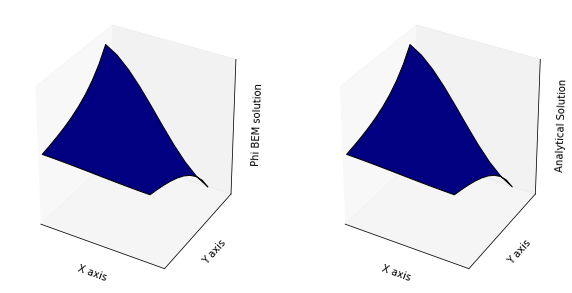

In [51]:
#Main Program
#Sets up geometry and boundaries

#number of elements per side
N0=40
#total number of elements
N=4*N0
dl=1./N0 #all boundary elements are of the same length (check!)
#position of the corners
xb=np.zeros(N+1)
yb=np.zeros(N+1)
#position of the midpoints
xm=np.zeros(N)
ym=np.zeros(N)
#length of each element
lg=np.zeros(N)
#normal vector
nx=np.zeros(N)
ny=np.zeros(N)
#type of boundary condition
BCT=np.zeros(N)
#Value of boundary condition
BCV=np.zeros(N)

#define the positions of the boundaries
for i in range(N0):
    xb[i]=i*dl           #bottom
    yb[1]=0.
    xb[N0+i]=1.          #right
    yb[N0+i]=xb[i]
    xb[2*N0+i]=1.-xb[i]  #top
    yb[2*N0+i]=1.
    xb[3*N0+i]=0.        #left
    yb[3*N0+i]=1.-xb[i]
#extend for simplicity of calculations
xb[N]=xb[0]
yb[N]=yb[0]


#Calculate midpoints, length, and normal vectors
for i in range(N):
    xm[i]=.5*(xb[i]+xb[i+1]) #midpoint
    ym[i]=.5*(yb[i]+yb[i+1])
    lg[i]=np.sqrt((xb[i+1]-xb[i])**2.+(yb[i+1]-yb[i])**2.) #length
    nx[i]=(yb[i+1]-yb[i])/lg[i] #normal vector
    ny[i]=(xb[i]-xb[i+1])/lg[i]

#Set Boundary Conditions
#if BCT=0 then phi is given
#if BCT=1 then dphi/dn is given
for i in range(N):
    if (i<N0):
        BCT[i]=1
        BCV[i]=0.
    elif (i>=N0) & (i<2*N0):
        BCT[i]=0
        BCV[i]=np.cos(np.pi*ym[i])
    elif (i>=2*N0) & (i<3*N0):
        BCT[i]=1
        BCV[i]=0.
    else:
        BCT[i]=0
        BCV[i]=0.
        
phi,dphi=CELAP1(N,xm,ym,xb,yb,nx,ny,lg,BCT,BCV)

Npint=10
x = np.linspace(.1,.9,Npint)
y = np.linspace(.1,.9,Npint)
X, Y = np.meshgrid(x,y)

phi_bem=np.zeros((Npint,Npint))
phi_ana=np.zeros((Npint,Npint))

for i in range(X.size):
    phi_bem.flat[i]=CELAP2(N,X.flat[i],Y.flat[i],xb,yb,nx,ny,lg,phi,dphi)
    phi_ana.flat[i]=np.sinh(np.pi*X.flat[i])*np.cos(np.pi*Y.flat[i])

phi_ana=phi_ana/np.sinh(np.pi)
                
fig = plt.figure(figsize=(10,5), dpi=100) ##the figsize parameter can be used to produce different sized images
#Plot the BEM Solution
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X,Y,pint.T[:])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Phi BEM solution')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
#Plot the Analytical Solution, see Eq. (41)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X,Y,phi_ana.T[:])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Analytical Solution');
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([]);

